In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [11]:
df_train = pd.read_csv("../01.Data/german_credit_train.csv")
df_test = pd.read_csv("../01.Data/german_credit_test.csv")

## EDA

In [12]:
df_train.head()

,CheckingStatus,LoanDuration,CreditHistory,LoanPurpose,LoanAmount,ExistingSavings,EmploymentDuration,InstallmentPercent,Sex,OthersOnLoan,...,OwnsProperty,Age,InstallmentPlans,Housing,ExistingCreditsCount,Job,Dependents,Telephone,ForeignWorker,Risk
0,0_to_200,31,credits_paid_to_date,other,1889,100_to_500,less_1,3,female,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
1,less_0,18,credits_paid_to_date,car_new,462,less_100,1_to_4,2,female,none,...,savings_insurance,37,stores,own,2,skilled,1,none,yes,No Risk
2,less_0,15,prior_payments_delayed,furniture,250,less_100,1_to_4,2,male,none,...,real_estate,28,none,own,2,skilled,1,yes,no,No Risk
3,0_to_200,28,credits_paid_to_date,retraining,3693,less_100,greater_7,3,male,none,...,savings_insurance,32,none,own,1,skilled,1,none,yes,No Risk
4,no_checking,28,prior_payments_delayed,education,6235,500_to_1000,greater_7,3,male,none,...,unknown,57,none,own,2,skilled,1,none,yes,Risk


In [37]:
print(f"Train dataset shape: {df_train.shape}")
print(f"Test dataset shape: {df_test.shape}")

Train dataset shape: (3999, 21)
Test dataset shape: (1001, 21)


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CheckingStatus            3999 non-null   object
 1   LoanDuration              3999 non-null   int64 
 2   CreditHistory             3999 non-null   object
 3   LoanPurpose               3999 non-null   object
 4   LoanAmount                3999 non-null   int64 
 5   ExistingSavings           3999 non-null   object
 6   EmploymentDuration        3999 non-null   object
 7   InstallmentPercent        3999 non-null   int64 
 8   Sex                       3999 non-null   object
 9   OthersOnLoan              3999 non-null   object
 10  CurrentResidenceDuration  3999 non-null   int64 
 11  OwnsProperty              3999 non-null   object
 12  Age                       3999 non-null   int64 
 13  InstallmentPlans          3999 non-null   object
 14  Housing                 

Let's study if there is any missing values in the datasets.

In [27]:
print(f'Missing values in the whole train dataset: {df_train.isnull().sum().sum()}')
print(f'Missing values in the whole test dataset: {df_test.isnull().sum().sum()}')

Missing values in the whole train dataset: 0
Missing values in the whole test dataset: 0


Let's split the data between numerical and categorical features.

In [36]:
numeric_features = df_train.select_dtypes(include=[np.number])
print(f"Numerical features: {numeric_features.columns.tolist()}")

categorical_features = df_train.select_dtypes(include=[object])
print(f"Categorical features: {categorical_features.columns.tolist()}")

Numerical features: ['LoanDuration', 'LoanAmount', 'InstallmentPercent', 'CurrentResidenceDuration', 'Age', 'ExistingCreditsCount', 'Dependents']
Categorical features: ['CheckingStatus', 'CreditHistory', 'LoanPurpose', 'ExistingSavings', 'EmploymentDuration', 'Sex', 'OthersOnLoan', 'OwnsProperty', 'InstallmentPlans', 'Housing', 'Job', 'Telephone', 'ForeignWorker', 'Risk']


Let's study the distribution of the numerical features

In [31]:
numeric_features.describe()

,LoanDuration,LoanAmount,InstallmentPercent,CurrentResidenceDuration,Age,ExistingCreditsCount,Dependents
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,21.252063,3482.700925,2.968242,2.838460,35.896224,1.470618,1.163541
std,11.125595,2498.295579,1.131982,1.115138,10.628733,0.568098,0.369905
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1300.500000,2.000000,2.000000,28.000000,1.000000,1.000000
50%,21.000000,3250.000000,3.000000,3.000000,36.000000,1.000000,1.000000
75%,29.000000,5363.000000,4.000000,4.000000,44.000000,2.000000,1.000000
max,64.000000,11676.000000,6.000000,6.000000,74.000000,3.000000,2.000000


Let's plot the distribution of the numerical features

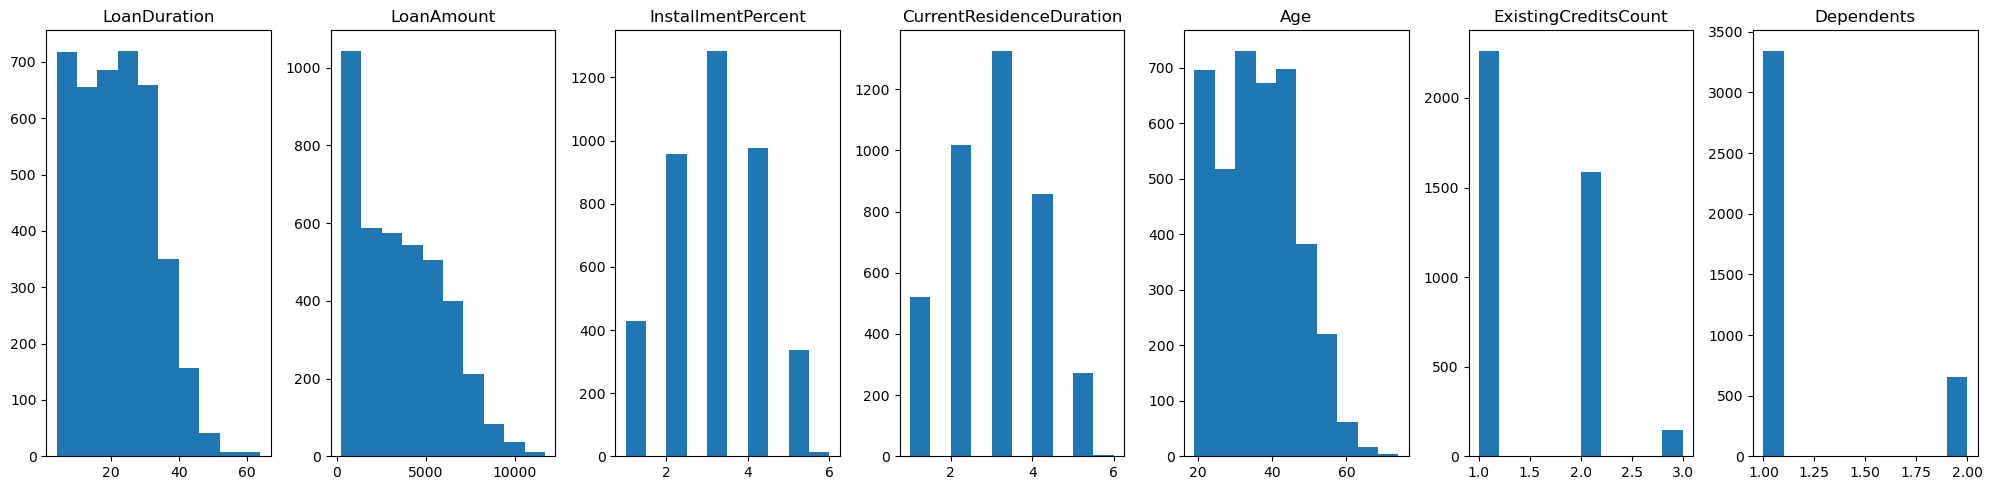

In [42]:
# Determine the number of columns in the DataFrame
num_columns = len(numeric_features.columns)

# Create a figure with 2 row of subplots
fig, axes = plt.subplots(1, num_columns, figsize=(20, 5))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (though it's already 1D in this case)
axes = axes.flatten()

# Plot each column in the DataFrame
for i, col in enumerate(numeric_features.columns):
    axes[i].hist(numeric_features[col])
    axes[i].set_title(col)

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

- The 'InstallmentPercent' and 'CurrentResidenceDuration' columns seems to have a Gaussian distribution.
- 'LoanDuration', 'LoanAmount', and 'Age' columns have a right-skewed distribution.

In [51]:
for column in numeric_features.columns:
    print(f'The feature {column} contains {len(df_train[column].unique())} unique values')

The feature LoanDuration contains 57 unique values
The feature LoanAmount contains 2794 unique values
The feature InstallmentPercent contains 6 unique values
The feature CurrentResidenceDuration contains 6 unique values
The feature Age contains 52 unique values
The feature ExistingCreditsCount contains 3 unique values
The feature Dependents contains 2 unique values


The value 'Dependant' takes only 2 values. Maybe we can encode it with a binary feature. <span style="color:red;">TO BE DISCUSSED</span>

Let's plot the correlation matrix to see the relationships between the features.

<Axes: >

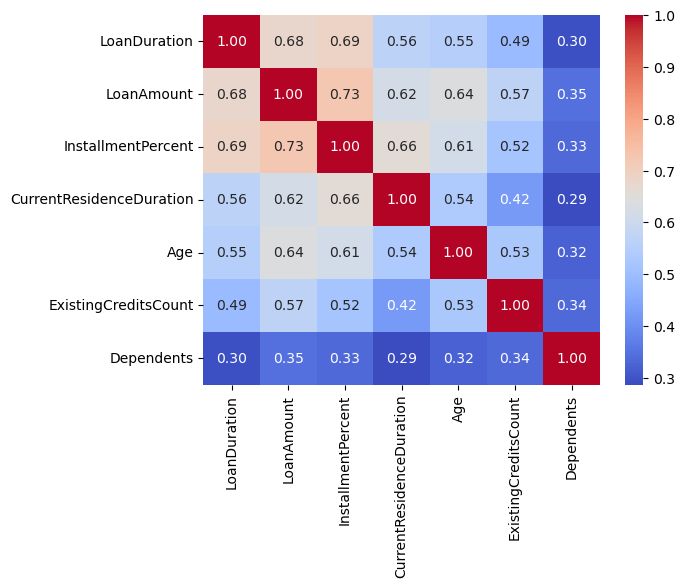

In [54]:
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

There is no big surprise in the correlation matrix. Some features are quite correlated with each other.

## Categorical features

In [52]:
for column in categorical_features.columns:
    print(f'The feature {column} contains {len(df_train[column].unique())} unique values')

The feature CheckingStatus contains 4 unique values
The feature CreditHistory contains 5 unique values
The feature LoanPurpose contains 11 unique values
The feature ExistingSavings contains 5 unique values
The feature EmploymentDuration contains 5 unique values
The feature Sex contains 2 unique values
The feature OthersOnLoan contains 3 unique values
The feature OwnsProperty contains 4 unique values
The feature InstallmentPlans contains 3 unique values
The feature Housing contains 3 unique values
The feature Job contains 4 unique values
The feature Telephone contains 2 unique values
The feature ForeignWorker contains 2 unique values
The feature Risk contains 2 unique values


The values 'Sex', 'Telephone', 'ForeignWorker', 'Risk' takes only 2 values. Maybe we can encode it with a binary feature. <span style="color:red;">TO BE DISCUSSED</span>

In [64]:
df_train['Risk'].value_counts(normalize=True)

Risk
No Risk    0.667417
Risk       0.332583
Name: proportion, dtype: float64

The split of the target variable is 1/3 vs. 2/3 which is a good split for a binary classification problem.

Let's analyze the categorical features in the dataset related to the target variable.

<Axes: xlabel='CheckingStatus'>

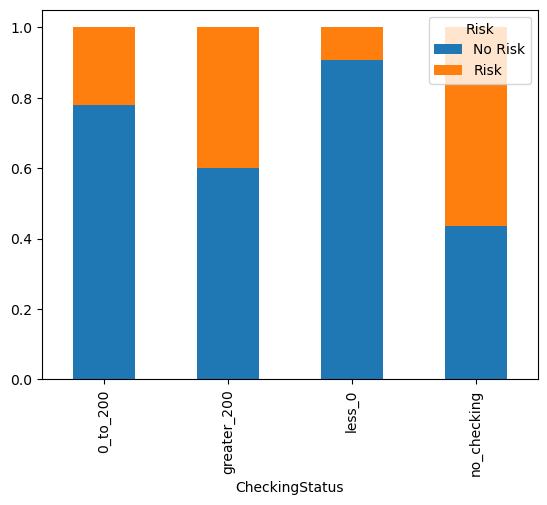

In [89]:
df_train.groupby('CheckingStatus')['Risk'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

- We note that the higher the checking account status, the higher the risk of the customer (no surprising). This categorical variable has to be encoded keeping the idea of ordinality. Maybe we can turn it into a numerical feature too. <span style="color:red;">TO BE DISCUSSED</span>
- The key point is that for the counts with no ckecking the Risk is almost 50%.